In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def delay_noise(signal):
    delay=np.random.randint(2*len(signal),4*len(signal),1)
    noise_signal=np.hstack((np.zeros(delay),signal))+np.random.normal(0,0.1,delay+len(signal))
    return noise_signal

<h1>Introducción</h1>
<p> En este laboratorio abordaremos el concepto de correlaci´on, el cual es una medida de similitud entre dos series
de tiempo, en funci´on del retraso de una respecto a la otra.</p>

<h2>Analisis de pulsos de radar</h2>
<p>Una de las aplicaciones cl´asicas de la correlaci´on se centra en los sistemas de radar aeron´auticos. En estos
sistemas, un transmisor env´ıa un pulso electromagn´etico de forma conocida, el cual es reflejado por alguna
aeronave y esta reflexi´on es captada por un receptor. La se˜nal recibida es una copia retrasada y con ruido del
pulso original. Para detectar el pulso original en esta se˜nal, se calcula la correlaci´on entre la se˜nal recibida y
el pulso original, all´ı donde se encuentre el m´aximo de la se˜nal de correlaci´on ser´a la ubicaci´on del pulso en
la reflexi´on.
Otra aplicaci´on de este mismo concepto es en las comunicaciones digitales, en este caso, un pulso que representa
un s´ımbolo (conjunto de bits) pasa por un canal que lo distorsiona. En el receptor se realiza la
correlaci´on con la forma original del pulso para encontrar el s´ımbolo adecuado.
Para esta pr´actica se debe usar la funci´on adjunta en el archivo utils.py, esta funci´on nos permitir´a simular
la distorsi´on de la se˜nal. No olvide incluirlo en la misma carpeta que tiene el jupyter-notebook de la pr´actica
e importarla.
</p>

<h3>1. |Genere un pulso rectangular de 35 muestras. Tip: Utilice la función de numpy np.ones(35). </h3>

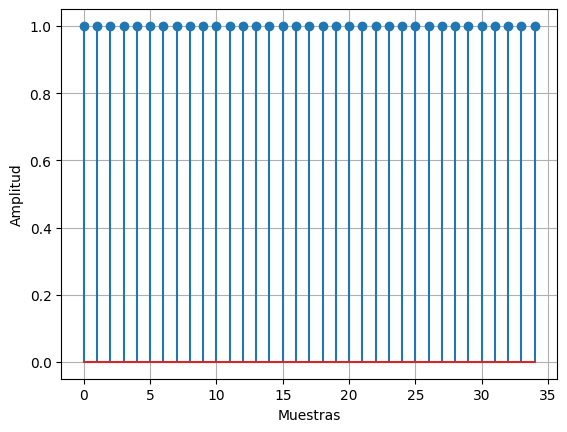

In [3]:
pulses=np.ones(35)
plt.stem(pulses)
plt.xlabel("Muestras")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

<h3>2.Calcule y grafique la función de autocorrelación del pulso generado</h3>

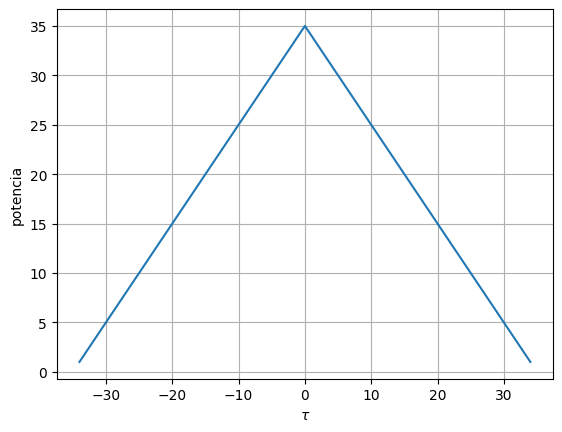

In [8]:
Rxx=np.correlate(pulses, pulses, mode='full')
tau=np.arange(-len(pulses)+1,len(pulses),1) # vector de retraso
plt.plot(tau,Rxx)
plt.xlabel(r'$\tau$')
plt.ylabel('potencia')
plt.grid()
plt.show()

<p>
De la grafica obtenida al correlacionar  ambos pulsos, es posible ver que al evaluar el resultado obtenido en cero, se estaría obteniendo la potencia máxima de la señal dentro de un intervalo dado. Por otro lado, una forma de ver la aplicabilidad de este tipo de correlación, puede ser a manera de ver un radar, en donde se manda una señal y al rebotar con una superficie, se puede ver que tanto de la señal regresa y se pierde. 
</p>

<h3>
3. Utilice la función delay noise incluida en la libreráa adjunta ’utils.py’ para simular el ruido introducido
por el canal, y el desfase de la señal recibida respecto a la original. Grafique el resultado, ¿Es capaz de
distinguir el pulso y decir cuanto es su retraso?
</h3>

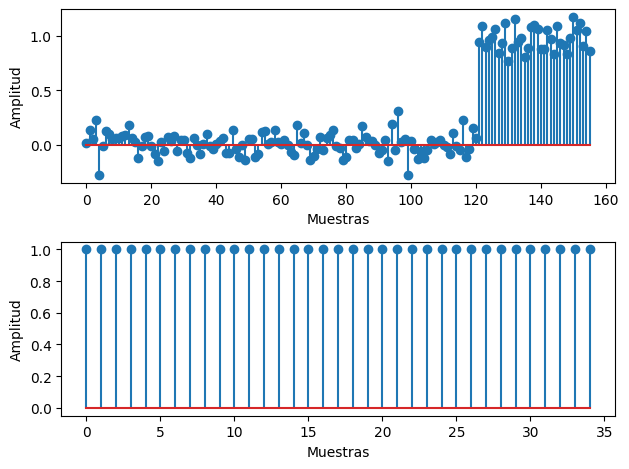

In [14]:
noise_pulses=delay_noise(pulses)
plt.subplot(211)
plt.stem(noise_pulses)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.subplot(212)
plt.stem(pulses)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')

plt.tight_layout() # comando para que se ajuste la graficas
plt.show()

<p>
<li>
En lo que respecta a ambas graficas, al pasar los pulsos por un canal con ruido y retardo, como se ve en la figura superior, es practicamente imposible determinar a ojo donde se encuentra un pulso y mucho menos el retardo, esto con un factor de ruido de 0.8. 
</li>
<li>
Una vez que se cambia el valor de ruido en la función brindada, en este caso para un valor de 0.1, es posible observar entonces como se nota un poco más la amplitud del pulso y además se nota un retardo en aproximadamente unas 120 muestras. 
</li>
</p>

<h3>
4.Utilice la funcion de numpy np.correlate para hallar la correlacion entre la señal distorsionada y la señnal
original. Muestre el resultado gráficamente ¿Cuál es el retraso? ¿Que se puede concluir?
</h3>

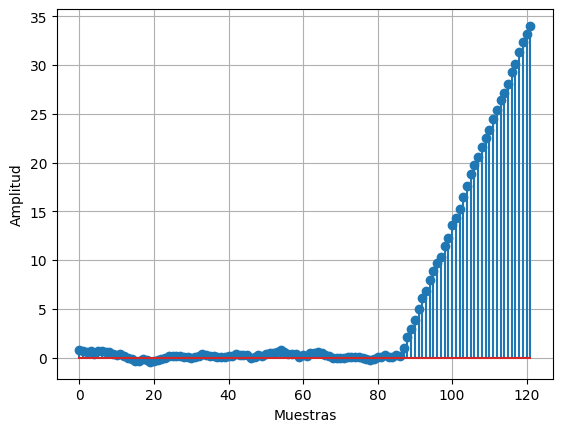

El valor del retraso en muestras es :  121


In [15]:
xcorr=np.correlate(noise_pulses,pulses)
plt.stem( xcorr)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

print('El valor del retraso en muestras es : ' , np.argmax(xcorr))

<p>
Según lo que se puede ver, el punto donde el valor máximo de la correlación de la señal es a partir de 120 muestras, en donde se puede ver un retraso, el cual corresponde al valor maximo de la señal, que en este caso corresponde a la aparición del pulso. Gracias a esto, es posible determinar por ejemplo en el caso de un radar, el momento en el cual la señal rebota y se encuentra nuevamente con la señal original, en donde se muestra la mayor similitud. 

</p>

<h2>Análisis de EEG</h2>

<ul>
<li><h3> Cargue el archivo eeg.npy con numpy.load, para cada canal normalice en amplitud y elimine el nivel DC.
Luego escoja el canal de acuerdo al ultimo numero de su cédula 
Finalmente grafique el canal elegido con y sin normalización usando subplot para una fácil comparación.
</h3>
    </li>

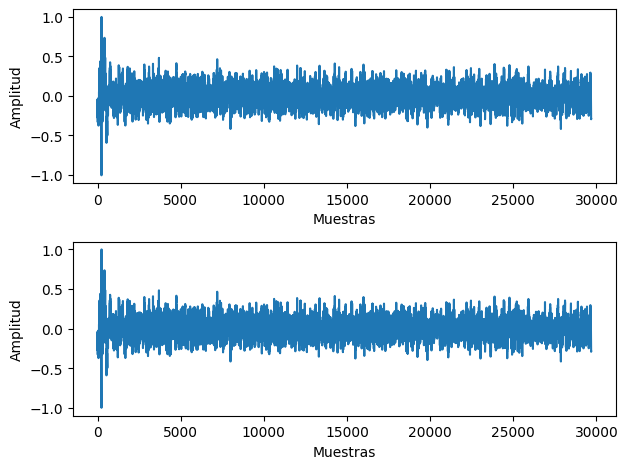

0.995611456499722
0.99951171875


In [46]:
canal4=np.load('eeg.npy')[4]
canal4=canal4/float(max(abs(canal4)))
media=np.mean(canal4)
sinDC=canal4-media
plt.subplot(211)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.plot(sinDC)


plt.subplot(212)
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.plot(canal4)


plt.tight_layout()

plt.show()

print(sinDC[np.argmax(sinDC)])
print(x[np.argmax(canal4)])



<p>
Visualmente no es tan fácil distinguir la supresión del valor de la media de la señal. Sin embargo, cuando se hace el calculo de esta, ese valor es demasiaado pequeño, casi cercano a 0, por otro lado, en lo que va a variar la señal normalizada de la que no lo está es basicamente en su amplitud, cuando no está normalizada la amplitud es aprox 100 y normalizado es alrededor de 1. Además, sse tiene que para quitar el nivel DC, basta con quitar la media a la señal original. 
</p>

<h3>Coeficiente de correlación entre canales</h3>
<li>
Ahora calcule el coeficiente de correlaci´on entre el canal que le corresponde y los otros canales. Finalmente,
grafique estos coeficientes de correlaci´on (deben ser 25) utilizando la funci´on plt.stem.
Tip: Use la funci´on np.corrcoef para calcular los coeficientes.
</li>
<li>
¿C´omo varia la correlaci´on entre el canal que le corresponde y los dem´as canales?. Realice un breve
an´alisis de lo observado.
</li>

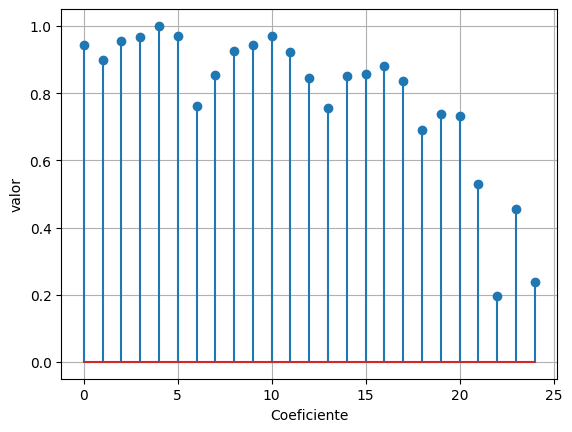

In [49]:
canales=np.load('eeg.npy')
canal=canales[4]
coeficientes=[]

for n in canales:
    coeficiente=np.corrcoef(canal,n)
    coeficientes.append(coeficiente[0,1])

plt.stem(coeficientes)
plt.xlabel("Coeficiente")
plt.ylabel("valor")
plt.grid()
plt.show()
    

<p>
Según lo que puede verse en la grafica, a medida que se realiza la correlación entre los diferentes canales, si nos centramos en el canal dado [4], puede verse que al hacer la autocorrelación, el valor del coeficiente es 1, el cual nos indica que la señal es exactamente la misma, lo cual es lo que se espera. cuando se van analizando los otros canales, este coeficiente va a ir disminuyendo o se va a mantener muy cerca a 1, esto simplemente indica que tan diferentes son los datos entre si.
Por ejemplo, cuando se tienen los canales entre el 20 y 25, se nota que los datos son muy distintos entre si. 
</p>

<h3>
Función de autocorrelación de un canal
<li>
Calcule la funci´on de autocorrelaci´on del canal que le corresponde, luego calcule la funci´on de autocorrelaci
´on para uno de los canales de los ojos (canal 22 o 24), finalmente grafique y compare las dos
funciones utilizando subplots.
</li>
<li>
¿Qu´e observa?. Describa brevemente las gr´aficas obtenidas.
</li>   
</h3>

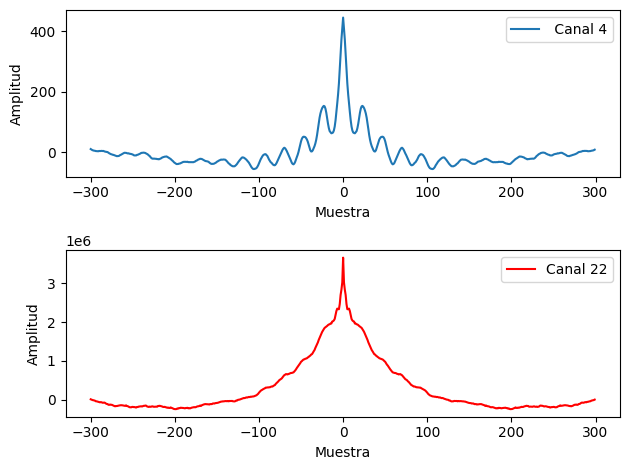

In [52]:
corr =  np.correlate(canal4 , canal4 , mode = 'full') 
energy = np.argmax(corr) 
corr =  corr[energy -300 : energy + 300] 
tau=np.arange(-len(corr)/2 , len(corr)/2 ,1) # el vector de muestras 



eyes = np.load('eeg.npy')[22] 
eyes_corr  = np.correlate(eyes , eyes , mode = 'full')
eyes_energy =  np.argmax(eyes_corr)
eyes_corr =  eyes_corr[eyes_energy-300: eyes_energy + 300]
tau_eyes = np.arange(-len(eyes_corr)/2, len(eyes_corr)/2 ,1)


#Graficamos
plt.subplot(211)
plt.plot(tau , corr, label=' Canal 4')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.legend()


plt.subplot(212)
plt.plot(tau_eyes ,eyes_corr, label='Canal 22', color = 'r')
plt.ylabel("Amplitud")
plt.xlabel("Muestra")
plt.legend()


plt.tight_layout()
plt.show()


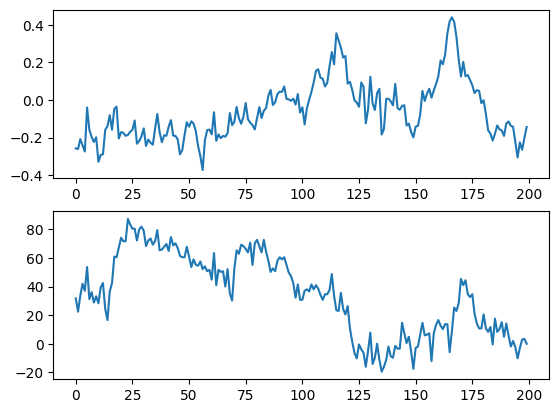

In [58]:
canal4=canal4[:500]
eyes=eyes[:500]
plt.subplot(211)
plt.plot(canal4)
plt.subplot(212)
plt.plot(eyes)


<p>
<li>Al obervar ambas graficas, es claro ver que la amplitud que se registra según el canal va a variar según el tipo de electrodo conectado.</li>
<li> Según lo obtendio, para el canal 4 nos da razón a la respuesta de los impulsos nerviosos , lo cual hace que sea un comportamiento cuasiperiodico, por otro lado, en el canal ocular, al tratarse de un movimiento especifico, esto se verá reflejado de una forma menos intensa.</li>
 

</p>

<h2>
CONCLUSIONES
</h2>

<li>
Una de las aplicaciones de analizar la correlación de diferentes canales de un EGG, puede dar importancia de como se puede tratar algún transtorno, que deficits se tienen, o como avanza un tratamiento según las señales captadas por los electrodos. 
</li>
<li>
En lo que respecta al analisis de los distintos electrodos, con un canal en especifico, puede mostrar el como se tiene una dependencia entre las señales del canal, por ejemplo cuando se hace la autocorrelacion del canal 4, con uno de los visuales, es por ello que se puede tener por ejemplo un patrón en el compartamiento de las señales. 

</li>

<li>Tener en cuenta los coeficientes de correlacion a la hora de analizar diferentes tipos de señales, da razón a como se pueden comportan según sea la situación, es decir, cuanto más cercano sea el coeficiente a 1, más relacionadas estaran las señales, lo cual permite en un campo más practico tener una referencia, para el estudio de futuros deficits neurologicos</li>